In [3]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [5]:
data = pd.read_csv('TaylorRuleData.csv', index_col = 0)

In [7]:
data.index = pd.to_datetime(data.index)

In [20]:
data.dropna(inplace = True)

In [22]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [85]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [87]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [89]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [92]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph for your model

In [95]:
import matplotlib.pyplot as plt

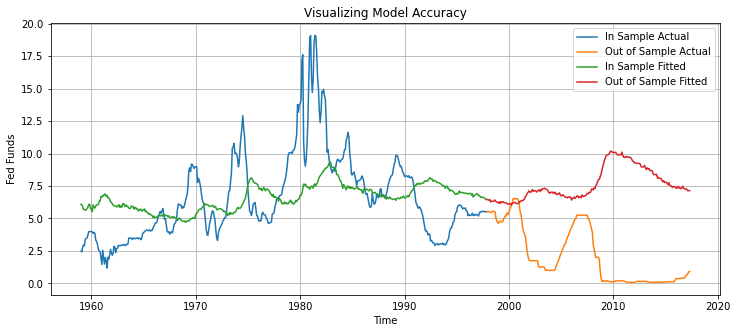

In [97]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["In Sample Actual", "Out of Sample Actual", "In Sample Fitted", "Out of Sample Fitted"])
plt.grid()
plt.show()

Observations

* The fitted lines are quite flat, not capturing the volatility
* There is under-fitting within the in-sample data which carried over into the out-sample data
* The FED stopped following a Taylor-rule influenced policy that made it harder to make predictions

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [102]:
from sklearn.metrics import mean_squared_error

In [104]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [106]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566745


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [108]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
max_degrees = 3

DEGREES :  1


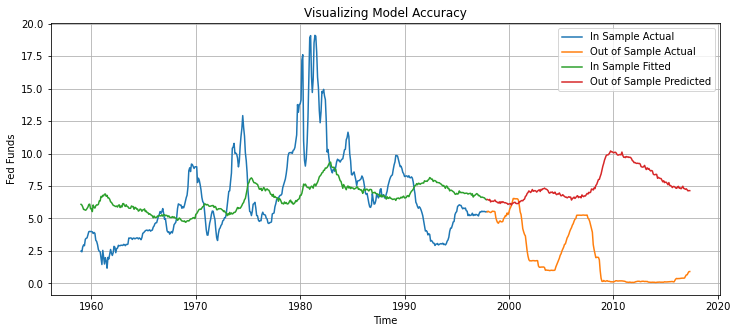

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566696
___________________________
DEGREES :  2


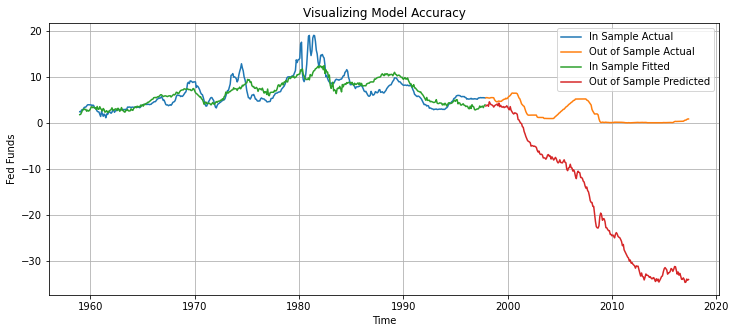

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099160513
___________________________
DEGREES :  3


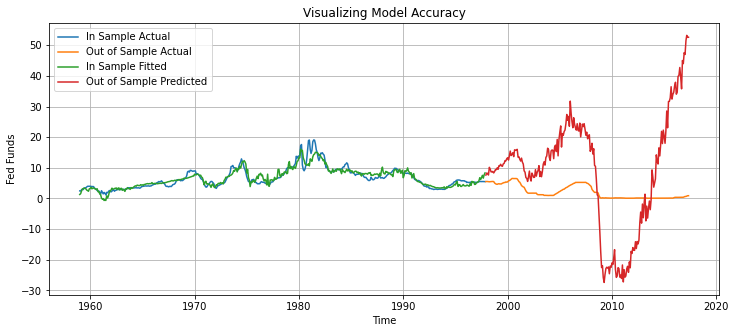

Insample MSE :  1.8723636267986128
Outsample MSE :  371.76638858949565
___________________________


In [118]:
for degrees in range(1,1+max_degrees):
    print("DEGREES : ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)

#Question 3
    model1 = sm.OLS(y_in, X_in_poly).fit()

#Question 4
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)                      
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In Sample Actual", "Out of Sample Actual", "In Sample Fitted", "Out of Sample Predicted"])
    plt.grid()
    plt.show()
    
#Question 5
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("___________________________")

# 7.) State your observations :

Degrees = 1

* The model is under-fit, entailing the highest in-sample MSE
* Despite being the most under-fit, this model performed with the lowest MSE for the out-sample portion of the data

Degrees = 2

* Although better than the "Degrees = 1" model, thus model still seems under-fit when examining the in-sample portion since the in-sample fitted line still does not reach the extent of the actual in-sample data's highs and lows
* However, when examining the out-sample data, the MSE is over 10x worse than the model from "Degrees = 1"
* It seems as though the model has passed the optimal point in the bias-variance tradeoff where bias is decreased but variance is too high

Degrees = 3

* For the in-sample portion of the data, this model is the best fit and has the lowest in-sample MSE
* However, similar to the model in "Degrees = 2", this one seems to have passed the optimal bias-variance tradeoff point even more: the out of sample predictions are volatile and extreme

Overall, we see that through the bias-variance tradeoff, as we make the model more complex it predicts the future worse.